<h2>Project (Black Team: Writing a Jupyter Notebook based Python Model
presented in the paper by Carlsson and Zambrano (2014); explaining the model, reproducing the results from the paper</h2>

<h3>Main Points of Research Paper:

a. Consider a simple (only one limiting substrate and one type of biomass) continuous stirred tank reactor (CSTR) having at least two bioreactors in series and a growth kinetics of the biomass described by a Monod function and Contois function.
    
b. In Monod function the effluent steady state concentration of substrate decreases when the influent concentration of substrate increases. This behaviour is very different from the classical one bioreactor case, where the effluent steady state substrate
concentration is independent of the influent substrate concentration.
    
c. In Contois function the effluent substrate concentration (in steady state) is proportional to the influent substrate concentration.
    
d. The implication of the above results for an ASP is outlined in a companion paper Zambrano and Carlsson (2014) where it numerically is shown that for a simple ASP process described by two bioreactors in series the same behaviour is obtained.
</h3>


<h3>Now, through the paper, 
    
dX/dt = [µ(S,X) - Q/V]X + Q/V * Xin    
dS/dt = -µ(S,X)/Y * X + Q/V(Sin - S)</h3>

<h4>where S and X are the substrate and biomass concentration in the bioreactor, respectively.
The influent volumetric flow rate is equal to the effluent flow rate Q.
Sin and Xin are the influent substrate and biomass concentration, respectively. V is the
bioreactor volume, Y is the yield factor and µ(S,X) is the specific growth rate.</h4>

# 1 CSTR

In [6]:
%matplotlib inline

# Libraries

import numpy as np    # bringing the NumPy library into current environment
import matplotlib.pyplot as plt    #for the plot
import math    # giving access to the mathematical functions

# Parameters from paper

Q = 1.0                 #m3/d
V = 3.0                 #volume
mumax = 2.0             #specific growth rate
Ks = 1.2                #Ks is the half saturation constant
Y = 0.8                 #yield factor
Xin = 0.0               #biomass concentration

#C=Contois #M=Monod



CSbar1,Sin = [],[]        #taking value of CSbar1 through range of Sin
MSbar1,Sin = [],[]        #taking value of MSbar1 through range of Sin

# Input

#Sin = [0, 0.5, 1, 1.5, 2]   #graph from paper represented this range

<h4>Through the paper, the solution for during non-wash-out condition is:
    
 Sbar = Sin(Q*Ks*Y/V*µmax+Q*Ks*Y-Q)</h4>


# Contois Model

In [7]:

i=0
while round(i,1)<=2:
  CSbar1.append(i * (( Q * Ks * Y )/( V * mumax + Q * Ks * Y - Q )))   #equation7
  i+=0.01

#for i in Sin:
  #CSbar1.append(i * (( Q * Ks * Y )/( V * mumax + Q * Ks * Y - Q )))

<h4>From the paper the condition to avoid wash-out(X > 0) are given by

Sin > QKs/(Vµmax-Q) = Sbar</h4>

# Monod Model

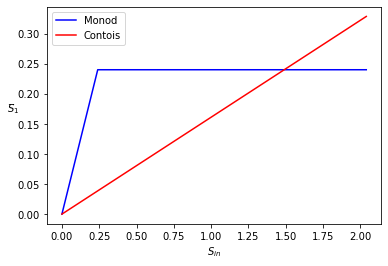

<Figure size 432x288 with 0 Axes>

In [8]:

MSbar = ( Q * Ks )/( V * mumax - Q)   #equation 5 from paper

i=0
while round(i,1)<=2:    #the graph range of paper is till 2
  Sin.append(i)   #using append function to add an item to the end of the list
  if  MSbar >= i:
    MSbar1.append(i)   #taking Sin value if Sbar greater or equal to i
  else:
    #print(i)
    MSbar1.append(MSbar)    #taking Sbar value through formula if Sbar less than i
  i+=0.01

# Plot

plt.plot(Sin,MSbar1,'b')     #for the Monod Graph
plt.plot(Sin,CSbar1,"r")     #for the Contois graph
plt.xlabel("$S_{in}$")      #using subscript for Sin and put in the x axis
plt.ylabel("$S\u0305_1$",rotation=0)     #using subscript for S1bar and put in the  axis
plt.legend(['Monod',
            'Contois'])       #describing the elements of the graph through legend function
plt.show()       #graph showing
plt.savefig('1 CSTR.jpg', dpi=300)

# 2 CSTR

In [22]:
# Parameters

Q = 1.0                 #m3/d
V = 3.0                  #volume
V1 = V / 2
mumax = 2.0              #specific growth rate
Ks = 1.2                 #Ks is the half saturation constant            
Y = 0.8                  #yield factor
Xin = 0.0                #biomass concentration



# Contios Model

<h4>From the paper Sbar2 =  (Sin / k7)  * [k1 + k2 + k3 - k4 - k5 - k6 * (µmax * V1 - Q )]</h4>

In [23]:
#to solve equation 13, we need to define k1,k2,k3,k4,k5,k6,k7 equation first

k1 = 2 * ( Ks * Q * Y ) ** 2
k2 = ( mumax * V1 ) ** 2
k3 = 2 * Ks * mumax * Q * V1 * Y
k4 = 2 * Ks * ( Q ** 2 ) * Y
k5 = mumax * Q * V1
k6 = math.sqrt( ( mumax * V1 * ( 2 * ( k1 + k3 - k4 ) + k2 - k5 ) ) / ( (mumax * V1 - Q ) ) )
k7 = 2 * ( ( k1 / 2 ) + k2 + k3 - k4 - ( 2 * k5 ) + ( Q ** 2 ) )

S = ( Q * Ks )/( V1 * mumax - Q)   #equation 5 from paper

<h4>Through the paper, the solution for during non-wash-out condition is:
  
 Sbar2 =  (Sin / k7)  * [k1 + k2 + k3 - k4 - k5 - k6 * (µmax * V1 - Q ) </h4>

In [24]:
MSbar2,Sin = [],[]   #taking value of MSbar2 through range of Sin
CSbar2,Sin = [],[]   #taking value of CSbar2 through range of Sin

# Input

#SinC2 = [0, 1 , 2 , 3, 4]   #graph from paper represented this range

In [25]:
i=0
while round(i,1)<=4:
  CSbar2.append( ( i / k7 ) * ( k1 + k2 + k3 - k4 - k5 - ( k6 * ( ( mumax * V1 ) - Q ) ) ) ) #equation 13
  i+=0.01

#for i in Sin:
  #CSbar2.append( ( i / k7 ) * ( k1 + k2 + k3 - k4 - k5 - ( k6 * ( ( mumax * V1 ) - Q ) ) ) )


# Monod Model

<h4>#taking equation 12 as quadratic formula 
    
# x=(-b+-sqrt(b^2-4ac))/2a

(Sbar2) *  * -Sbar2(Vµmax(Sin-Sbar1)+2QKs/Vµmax-Q)+(QKs/Vµmax-Q)  * *  =0</h4>

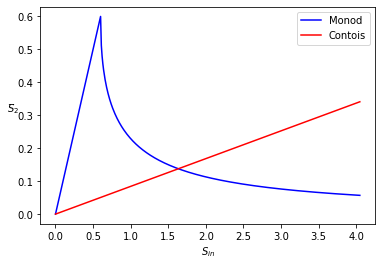

<Figure size 432x288 with 0 Axes>

In [26]:
a = 1
#b = (( mumax * V * ( i - S ) + 2 * Q * Ks ) ) / ( V1 * mumax - Q)
c = ( ( Q * Ks ) / ( V1 * mumax - Q )  ) ** 2
#x = ( - b + math.sqrt( (b ** 2) - (4 * a * c ))) / 2 * a

i=0
while round(i,1)<=4:       #the graph range of paper is till 4
  Sin.append(i)         #using append function to add an item to the end of the list
  if  S >= i:
    MSbar2.append(i)    #taking Sin value if Sbar greater or equal to i
  else:
    #print(i)
    b = (( mumax * V1 * ( i - S ) + 2 * Q * Ks ) ) / ( V1 * mumax - Q)   #taking Sbar value through formula if Sbar
#equation 12      
    MSbar2.append(abs((- b + math.sqrt( (b ** 2) - (4 * a * c ))) / 2 * a))
  i+=0.01
  #if round(i,1)==4:
    #break
    
# Plot

plt.plot(Sin,MSbar2,'b')    #for the Monod Graph
plt.plot(Sin,CSbar2,"r")    #for the Contois graph
plt.xlabel("$S_{in}$")      #using subscript for Sin and put in the x axis
plt.ylabel("$S\u0305_2$",rotation=0)   #using subscript for S1bar and put in the  axis
plt.legend(['Monod',
            'Contois'])    #describing the elements of the graph through legend function
plt.show()     #graph showing
plt.savefig('2 CSTR.jpg', dpi=300)


<h3>We have shown (both analytically and by simulation studies) that a bioreactor model
can give very different results depending on the bioreactor configuration (one or
multiple zones) and on the choice of growth kinetics (Monod or Contois)</h3>